# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations

1) Latitude is a strong indicator for temperature. As you get further from the equator in either direction the temperature cools down.

2) Latitude does not have a strong correlation for the other criteria we were pulling in (Humidity, Wind Speed, Cloudiness). I imagine there are other factors that cause these, but would need more data to look into that.

3) On average there are more cities in the northern hemisphere than southern.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities = pd.DataFrame(cities)

In [5]:
city_data = cities
city_data = city_data.rename(columns = {0:"City"})
city_data["Cloudiness"] = ""
city_data["Country"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""
city_data.head()

base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "q" : '',
    "appid" : weather_api_key,
    "units" : "imperial"
}

for index, row in city_data.iterrows():

    city_row =  row['City']
    params["q"] = city_row

    print(f"Processing Record {index}: {city_row}.")
    response = requests.get(base_url, params=params).json()
    
    try:
        city_data.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_data.loc[index, "Country"] = response["sys"]["country"]
        city_data.loc[index, "Date"] = response["dt"]
        city_data.loc[index, "Humidity"] = response["main"]["humidity"]
        city_data.loc[index, "Lat"] = response["coord"]["lat"]
        city_data.loc[index, "Lng"] = response["coord"]["lon"]
        city_data.loc[index, "Max Temp"] = response["main"]["temp_max"]
        city_data.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        city_data = city_data.drop([index], axis=0)
print("----------")
print("Data Collection Complete.")

pacific grove.
Processing Record 43: sorong.
Processing Record 44: cap malheureux.
Processing Record 45: road town.
Processing Record 46: lebu.
Processing Record 47: batemans bay.
Processing Record 48: barinas.
Processing Record 49: bambanglipuro.
Processing Record 50: flinders.
Processing Record 51: boyolangu.
Processing Record 52: vaini.
Processing Record 53: castro.
Processing Record 54: hobart.
Processing Record 55: vao.
Processing Record 56: cherskiy.
Processing Record 57: east london.
Processing Record 58: port lincoln.
Processing Record 59: nagato.
Processing Record 60: karasjok.
Processing Record 61: punta arenas.
Processing Record 62: jamestown.
Processing Record 63: khatanga.
Processing Record 64: nikolskoye.
Processing Record 65: upernavik.
Processing Record 66: atuona.
Processing Record 67: samarai.
Processing Record 68: suntar.
Processing Record 69: naze.
Processing Record 70: mys shmidta.
City not found. Skipping...
Processing Record 71: gwadar.
Processing Record 72: cele

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data.to_csv("cities_output.csv", index = False)

city_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [22]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,georgetown,20,MY,1584502022,59,5.41,100.34,89.6,6.93
1,ushuaia,20,AR,1584501756,58,-54.8,-68.3,53.6,5.82
2,tigil,100,RU,1584502023,81,57.8,158.67,19.87,11.05
3,kapuskasing,40,CA,1584502023,61,49.42,-82.43,17.6,4.25
4,plouzane,25,FR,1584502023,93,48.38,-4.62,42.8,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

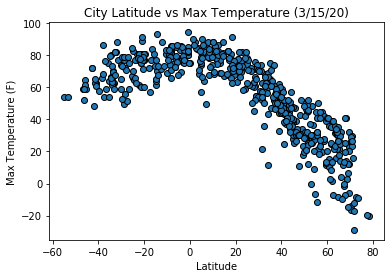

In [8]:
plt.scatter(city_data["Lat"],city_data["Max Temp"], edgecolors = "black")
plt.title("City Latitude vs Max Temperature (3/15/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_temp.png')

#### Latitude vs. Humidity Plot

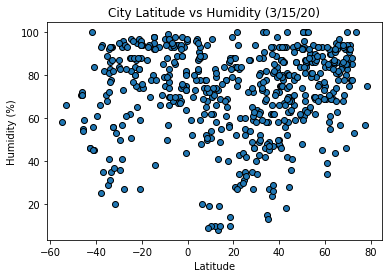

In [9]:
plt.scatter(city_data["Lat"],city_data["Humidity"], edgecolors = "black")
plt.title("City Latitude vs Humidity (3/15/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

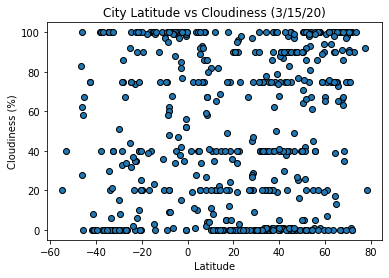

In [10]:
plt.scatter(city_data["Lat"],city_data["Cloudiness"], edgecolors = "black")
plt.title("City Latitude vs Cloudiness (3/15/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

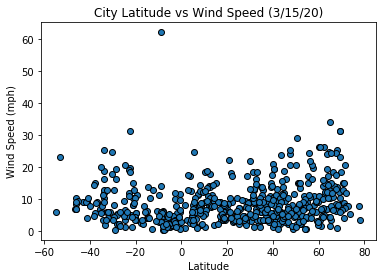

In [11]:
plt.scatter(city_data["Lat"],city_data["Wind Speed"], edgecolors = "black")
plt.title("City Latitude vs Wind Speed (3/15/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_wind.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x.astype(float) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolors = "black")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color="red")
    print(f'The r-squared is: {rvalue}')

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data.loc[city_data["Lat"] >= 0]
southern_df = city_data.loc[city_data["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8879770519941702


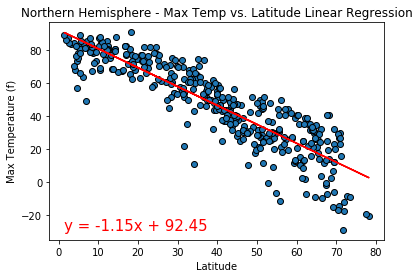

In [14]:
linreg(northern_df["Lat"], northern_df["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (f)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5937987887646169


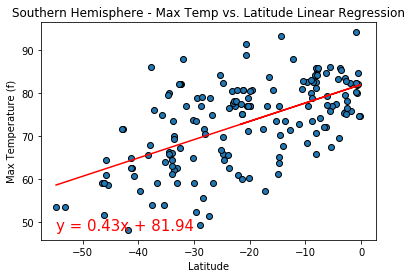

In [15]:
linreg(southern_df["Lat"], southern_df["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (f)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_temp.png')

## Max Temp vs. Latitude Observations:

Linear Regression shows that as you get further from the equater the temperature gets colder. This can be seen in both hemispheres, however much more pronounced in Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.30009480361767155


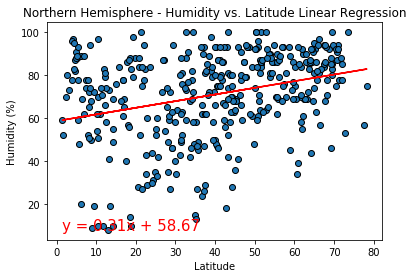

In [16]:
linreg(northern_df["Lat"], northern_df["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_humid.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34016710654633403


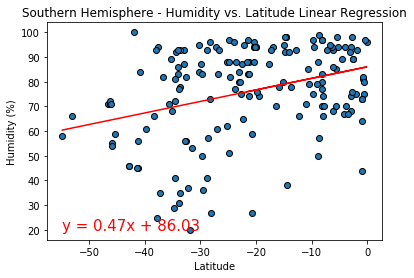

In [17]:
linreg(southern_df["Lat"], southern_df["Humidity"])
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_humid.png')

## Humidity (%) vs. Latitude Observations:

Humidity doesn't see as much of a trend as the Temperature, I'm guessing that we don't see this as pronounced is because humidity can be determined more by coastal cities.



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2692809256449536


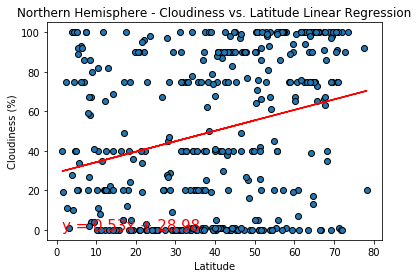

In [18]:
linreg(northern_df["Lat"], northern_df["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3494649013807803


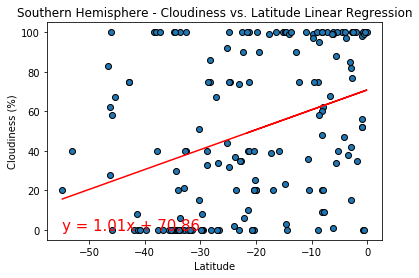

In [19]:
linreg(southern_df["Lat"], southern_df["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_cloudiness.png')

## Cloudiness (%) vs. Latitude Observations:

Cloudiness doesn't see as much of a trend as the Temperature, there is not a strong correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2041474085329046


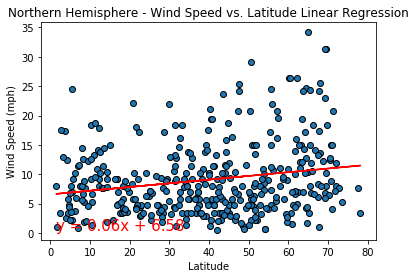

In [20]:
linreg(northern_df["Lat"], northern_df["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2504778950721273


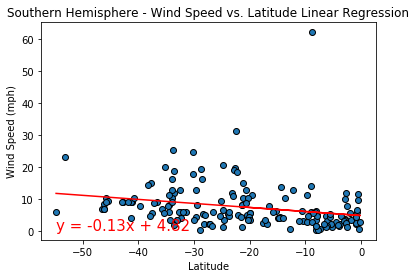

In [21]:
linreg(southern_df["Lat"], southern_df["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_wind.png')

## Wind Speed (mph) vs. Latitude Observations:

There is not a strong correlation between Wind Speed and Latitude.